<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Jakub_Kownacki_praca_domowa_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------
#1. Analiza problemu dla scenariusza A i B
-------------------------------

##Scenariusz A: Dopasowanie stałego predyktora od zera
Chcemy znaleźć $ \lambda^* $, które minimalizuje:

$$
\sum_{i=1}^n L(y_i, \lambda) = \sum_{i=1}^n \left[ -y_i \log(\sigma(\lambda)) - (1 - y_i) \log(1 - \sigma(\lambda)) \right].
$$

Ponieważ $ \lambda $ jest stałe dla wszystkich $ i $, możemy uprościć problem, oznaczając $ p = \sigma(\lambda) = \frac{1}{1 + e^{-\lambda}} $. Strata staje się:

$$
\sum_{i=1}^n \left[ -y_i \log(p) - (1 - y_i) \log(1 - p) \right].
$$

Jest to ujemne logarytmiczne prawdopodobieństwo dla rozkładu Bernoulliego. Aby znaleźć minimum, obliczamy pochodną względem $ \lambda $ i ustawiamy ją na zero.

Całkowita strata to:

$$
L = -m \log(p) - k \log(1 - p),
$$

gdzie $ m = \sum_{i=1}^n y_i $ (liczba jedynek), $ k = n - m $ (liczba zer). Pochodna względem $ \lambda $:

$$
\frac{dL}{d\lambda} = \frac{dL}{dp} \cdot \frac{dp}{d\lambda}.
$$

Obliczamy:

$$
\frac{dL}{dp} = -\frac{m}{p} + \frac{k}{1 - p},
$$

$$
\frac{dp}{d\lambda} = \sigma(\lambda) (1 - \sigma(\lambda)) = p (1 - p).
$$

Zatem:

$$
\frac{dL}{d\lambda} = \left( -\frac{m}{p} + \frac{k}{1 - p} \right) p (1 - p) = -m (1 - p) + k p.
$$

Ustawiamy pochodną na zero:

$$
-m (1 - p) + k p = 0,
$$

$$
-m + m p + k p = 0,
$$

$$
p (m + k) = m,
$$

$$
p = \frac{m}{m + k} = \frac{m}{n}.
$$

Ponieważ $ p = \sigma(\lambda) $, mamy:

$$
\frac{1}{1 + e^{-\lambda}} = \frac{m}{n},
$$

$$
1 + e^{-\lambda} = \frac{n}{m},
$$

$$
e^{-\lambda} = \frac{n}{m} - 1 = \frac{n - m}{m} = \frac{k}{m},
$$

$$
-\lambda = \log\left( \frac{k}{m} \right),
$$

$$
\lambda^* = \log\left( \frac{m}{k} \right).
$$

Można zauważyć, że pochodna $ \frac{dL}{d\lambda} = -m (1 - p) + k p $ jest ujemna na lewo od $ \lambda^* $ (gdy $ p < \frac{m}{n} $) i dodatnia na prawo od $ \lambda^* $ (gdy $ p > \frac{m}{n} $), zatem całkowita strata $L$ ma minimum w $\lambda^*$.

##Interpretacja wyniku
$ \lambda^* = \log\left( \frac{m}{k} \right) $ reprezentuje logarytm ilorazu szans (log-odds) klasy pozytywnej. Po przejściu przez funkcję sigmoidalną $\sigma(\lambda^*) = \frac{m}{n} $, co odpowiada proporcji jedynek w zbiorze danych do liczby wszystkich punktów w zbiorze danych. Jest to najlepsza stała predykcja w przypadku braku cech, odzwierciedlająca rozkład etykiet.

##Scenariusz B: Dopasowanie m-tego predyktora w procedurze Forward Stagewise
Chcemy znaleźć $ \lambda^* $, które minimalizuje:

$$
\sum_{i=1}^n L(y_i, f_i + \lambda).
$$

Obliczamy pochodną straty względem $ \lambda $:

$$
L(y_i, z_i) = -y_i \log(\sigma(z_i)) - (1 - y_i) \log(1 - \sigma(z_i)),
$$

gdzie $ z_i = f_i + \lambda $. Pochodna względem $ z_i $:

$$
\frac{\partial L}{\partial z_i} = -y_i \frac{\sigma'(z_i)}{\sigma(z_i)} + (1 - y_i) \frac{\sigma'(z_i)}{1 - \sigma(z_i)},
$$

$$
\sigma'(z_i) = \sigma(z_i) (1 - \sigma(z_i)),
$$

$$
\frac{\partial L}{\partial z_i} = -y_i (1 - \sigma(z_i)) + (1 - y_i) \sigma(z_i) = \sigma(z_i) - y_i.
$$

Całkowita pochodna względem $ \lambda $:

$$
\frac{\partial}{\partial \lambda} \sum_{i=1}^n L(y_i, f_i + \lambda) = \sum_{i=1}^n (\sigma(f_i + \lambda) - y_i).
$$

Ustawiamy na zero:

$$
\sum_{i=1}^n (\sigma(f_i + \lambda) - y_i) = 0,
$$

$$
\sum_{i=1}^n \sigma(f_i + \lambda) = \sum_{i=1}^n y_i = m.
$$

To jest równanie implicitne dla $ \lambda $.

##Dyskusja
Równanie $ \sum_{i=1}^n \sigma(f_i + \lambda) = m $ nie ma prostego rozwiązania w formie zamkniętej, ponieważ funkcja sigmoidalna jest nieliniowa, a wartości $ f_i $ różnią się dla każdego punktu danych. W scenariuszu A $ \lambda $ jest takie samo dla wszystkich punktów, co upraszcza problem do pojedynczego parametru $ p $. W scenariuszu B nieliniowość sigmoidalnej transformacji $ f_i + \lambda $ sprawia, że równanie zależy od rozkładu $ f_i $, co wymaga metod numerycznych (np. za pomocą zaimplementowanego w pythonie minimize_scalar) do rozwiązania.

-----------------------------------------
#2. Importowanie bibliotek
-----------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

--------------------------------------
#3. Funkcje pomocnicze
--------------------------------------

In [2]:
# Funkcja sigmoidalna
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Strata binarnej entropii krzyżowej dla pojedynczej próbki
def binary_cross_entropy(y, z):
    p = sigmoid(z)
    return -y * np.log(p + 1e-15) - (1 - y) * np.log(1 - p + 1e-15)

# Całkowita strata dla scenariusza A
def loss_A(lambda_, y):
    return np.sum([binary_cross_entropy(y_i, lambda_) for y_i in y])

# Całkowita strata dla scenariusza B
def loss_B(lambda_, y, f):
    return np.sum([binary_cross_entropy(y_i, f_i + lambda_) for y_i, f_i in zip(y, f)])

-----------------------------------------
#4. Generowanie danych
-------------------------------------------

In [3]:
m = 1000  # liczba jedynek
k = 1500  # liczba zer
n = 2500
y = np.array([1]*m + [0]*k)
np.random.shuffle(y)  # losowe przemieszanie etykiet

# Generowanie f_i z rozkładu normalnego
f = np.random.normal(0, 1, n)

-----------------------------------------------------
#5. Obliczenia dla scenatiusza A i B oraz przedstawienie wyników na wykresach
------------------------------------------------------

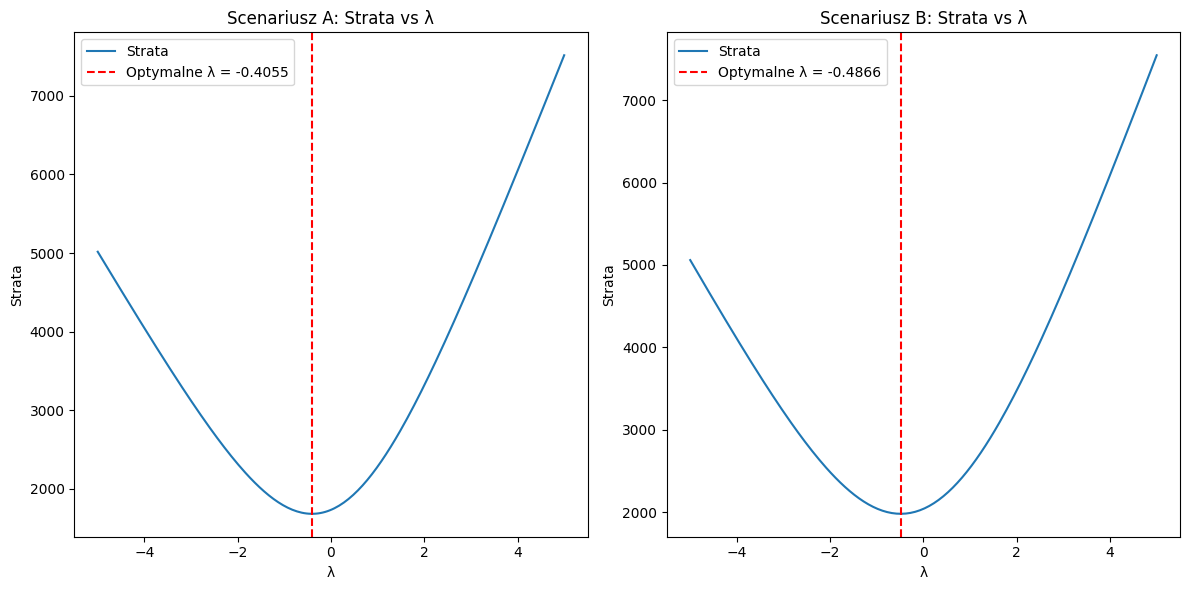

Teoretyczne optymalne λ dla scenariusza A: -0.4055
Numeryczne optymalne λ dla scenariusza B: -0.4866


In [4]:
# Zakres wartości lambda do wykresu
lambda_values = np.linspace(-5, 5, 200)

# Obliczanie straty dla scenariusza A
loss_A_values = [loss_A(lam, y) for lam in lambda_values]

# Obliczanie straty dla scenariusza B
loss_B_values = [loss_B(lam, y, f) for lam in lambda_values]

# Teoretyczne optymalne lambda dla scenariusza A
lambda_star_A = np.log(m / k)

# Numeryczne optymalne lambda dla scenariusza B
result = minimize_scalar(lambda lam: loss_B(lam, y, f), method='golden')
lambda_star_B = result.x

# Wykresy krajobrazów straty
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lambda_values, loss_A_values, label='Strata')
plt.axvline(x=lambda_star_A, color='r', linestyle='--', label=f'Optymalne λ = {lambda_star_A:.4f}')
plt.title("Scenariusz A: Strata vs λ")
plt.xlabel("λ")
plt.ylabel("Strata")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lambda_values, loss_B_values, label='Strata')
plt.axvline(x=lambda_star_B, color='r', linestyle='--', label=f'Optymalne λ = {lambda_star_B:.4f}')
plt.title("Scenariusz B: Strata vs λ")
plt.xlabel("λ")
plt.ylabel("Strata")
plt.legend()

plt.tight_layout()
plt.show()

# Wyświetlanie wyników
print(f"Teoretyczne optymalne λ dla scenariusza A: {lambda_star_A:.4f}")
print(f"Numeryczne optymalne λ dla scenariusza B: {lambda_star_B:.4f}")

##Dyskusja:
**1.Czy krajobraz straty w Scenariuszu A jest prostszy czy bardziej złożony niż w Scenariuszu B?**\
Dla naszych danych krajobraz straty w Scenariuszu A jest nieco prostszy niż w Scenariuszu B. W Scenariuszu A krzywa straty ma bardziej "ostro" zdefiniowane minimum w pobliżu
λ≈−0.4055, co oznacza, że gradienty w okolicy tego punktu są wyraźniejsze i łatwiejsze do wykorzystania w procesie optymalizacji. W Scenariuszu B minimum, zlokalizowane w λ≈−0.5092, jest bardziej płaskie, co może utrudniać precyzyjne określenie optymalnego λ, szczególnie w metodach numerycznych opartych na gradientach. Jednakże oba krajobrazy są stosunkowo proste, ponieważ nie wykazują złożonych struktur, takich jak wiele minimów lokalnych – są to krzywe gładkie i symetryczne o charakterze paraboloidalnym.\
**2.Czy krajobrazy straty są multimodalne czy unimodalne?**\
Krajobraz straty w obu scenariuszach – zarówno w Scenariuszu A, jak i w Scenariuszu B – jest unimodalny. Na wykresach widoczne jest jedno wyraźne minimum globalne (odpowiednio λ≈−0.4055 dla A i λ≈−0.5092 dla B), bez jakichkolwiek dodatkowych ekstremów lokalnych.\
**3.Czy można numerycznie znaleźć minimalizator λ w Scenariuszu B?**\
Tak, znalezienie minimalizatora λ w Scenariuszu B jest możliwe przy użyciu metod numerycznych. Krajobraz straty w tym scenariuszu B charakteryzuje się unimodalnością, co oznacza, że posiada jedno wyraźne globalne minimum. Dzięki temu proces optymalizacji nie jest skomplikowany przez obecność wielu lokalnych minimów, a minimalizator λ można efektywnie wyznaczyć.\
**4.Skąd bierze się trudność w Scenariuszu B: z nieliniowości problemu czy ze złożonego krajobrazu straty?**\
Trudność w Scenariuszu B nie wynika ze złożonego krajobrazu straty, który jest unimodalny i stosunkowo prosty, ale raczej z nieliniowości problemu. Lekkie spłaszczenie krzywej w pobliżu minimum sugeruje, że gradienty w tym obszarze są mniejsze, co może być efektem nieliniowej funkcji straty, takiej jak funkcja sigmoidalna. Mniejsze gradienty mogą spowalniać konwergencję metod numerycznych opartych na ich wykorzystaniu, wymagając większej precyzji lub bardziej wyrafinowanych podejść optymalizacyjnych. Zatem głównym źródłem potencjalnych wyzwań jest nieliniowość, a nie skomplikowana topologia krajobrazu straty.